In [ ]:
pip install opendatasets

In [ ]:
import opendatasets as od
od.download("https://www.kaggle.com/c/house-prices-advanced-regression-techniques/")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: sriparnoganguly
Your Kaggle Key: ··········


100%|██████████| 199k/199k [00:00<00:00, 59.9MB/s]


Extracting archive ./house-prices-advanced-regression-techniques/house-prices-advanced-regression-techniques.zip to ./house-prices-advanced-regression-techniques


In [ ]:
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

df = pd.read_csv('./house-prices-advanced-regression-techniques/train.csv')
df = df.dropna(subset = ['OverallCond', 'Street', '1stFlrSF', 'Neighborhood', 'YearBuilt', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'GrLivArea'])
df = pd.get_dummies(df, columns = ['Street'])
df['Neighborhood']= preprocessing.LabelEncoder().fit_transform(df['Neighborhood'])
X = df.drop('SalePrice', axis=1)
Y = df[['SalePrice']]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=76)

In [ ]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
xIII_train = X_train[['LotArea']]
xIII_test = X_test[['LotArea']]

yIII_train = Y_train
yIII_test = Y_test

model0 = LinearRegression()
model0.fit(xIII_train, yIII_train)
slope = model0.coef_[0]
intercept = model0.intercept_

In [ ]:
### Visualization
def viz_linear(A,B,C):
    plt.scatter(A, B, color='violet')
    plt.plot(A, model0.predict(A), color='red')
    plt.title(C)
    plt.xlim(0 , 75000)
    plt.ylim(0 , 600000)
    plt.xlabel('LotArea')
    plt.ylabel('SalePrice')
    plt.show()
    return

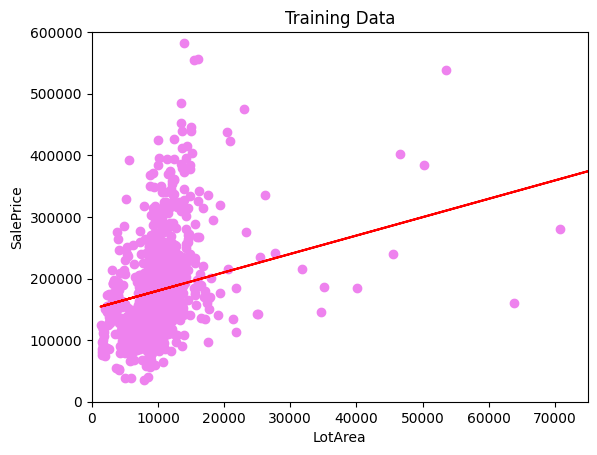

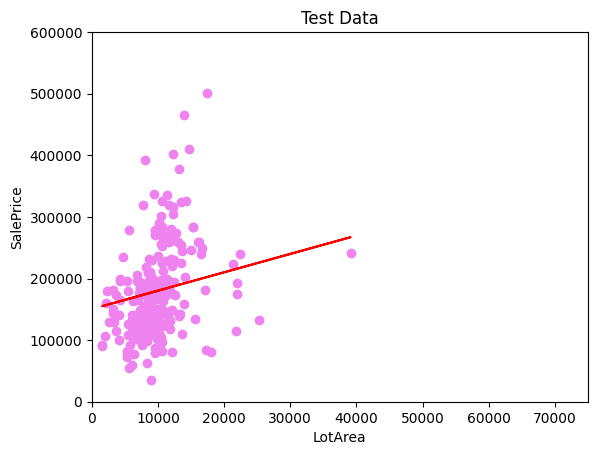

In [ ]:
viz_linear(xIII_train,yIII_train,'Training Data')
viz_linear(xIII_test,yIII_test,'Test Data')

In [ ]:
xIVa_train = X_train[['LotFrontage','LotArea']]
xIVa_test = X_test[['LotFrontage','LotArea']]

yIVa_train = Y_train
yIVa_test = Y_test

model1 = LinearRegression()
model1.fit(xIVa_train, yIVa_train)

intercept = model1.intercept_

print(intercept)

[99441.31152145]


In [ ]:
xIVb_train = X_train[['LotFrontage','LotArea','OverallQual','OverallCond']]
xIVb_test = X_test[['LotFrontage','LotArea','OverallQual','OverallCond']]

yIVb_train = Y_train
yIVb_test = Y_test

model2 = LinearRegression()
model2.fit(xIVb_train, yIVb_train)

intercept = model2.intercept_
print(intercept)

[-113075.77081379]


In [ ]:
xIVc_train = X_train[['LotFrontage','LotArea','OverallQual','OverallCond','1stFlrSF', 'GrLivArea']]
xIVc_test = X_test[['LotFrontage','LotArea','OverallQual','OverallCond','1stFlrSF', 'GrLivArea']]

yIVc_train = Y_train
yIVc_test = Y_test

model3 = LinearRegression()
model3.fit(xIVc_train, yIVb_train)

intercept = model3.intercept_
print(intercept)

[-121258.47779848]


In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

train_predictions1 = model1.predict(xIVa_train)
train_mse1 = mean_squared_error(yIVa_train, train_predictions1)
train_score1 = r2_score(yIVa_train, train_predictions1)

test_predictions1 = model1.predict(xIVa_test)
test_mse1 = mean_squared_error(yIVa_test, test_predictions1)
test_score1 = r2_score(yIVa_test, test_predictions1)

print("Model1")
print("For Training Data, the mean-squared error is",train_mse1,"and the r2 score is",train_score1)
print("For Testing Data, the mean-squared error is",test_mse1,"and the r2 score is",test_score1)


train_predictions2 = model2.predict(xIVb_train)
train_mse2 = mean_squared_error(yIVb_train, train_predictions2)
train_score2 = r2_score(yIVb_train, train_predictions2)

test_predictions2 = model2.predict(xIVb_test)
test_mse2 = mean_squared_error(yIVb_test, test_predictions2)
test_score2 = r2_score(yIVb_test, test_predictions2)

print("\nModel2")
print("For Training Data, the mean-squared error is",train_mse2,"and the r2 score is",train_score2)
print("For Testing Data, the mean-squared error is",test_mse2,"and the r2 score is",test_score2)

train_predictions3 = model3.predict(xIVc_train)
train_mse3 = mean_squared_error(yIVc_train, train_predictions3)
train_score3 = r2_score(yIVc_train, train_predictions3)

test_predictions3 = model3.predict(xIVc_test)
test_mse3 = mean_squared_error(yIVc_test, test_predictions3)
test_score3 = r2_score(yIVc_test, test_predictions3)

print("\nModel3")
print("For Training Data, the mean-squared error is",train_mse3,"and the r2 score is",train_score3)
print("For Testing Data, the mean-squared error is",test_mse3,"and the r2 score is",test_score3)

Model1
For Training Data, the mean-squared error is 5614186657.942735 and the r2 score is 0.15808933486514698
For Testing Data, the mean-squared error is 6891050357.003142 and the r2 score is 0.14467525736310383

Model2
For Training Data, the mean-squared error is 2101328256.5247004 and the r2 score is 0.6848821070787745
For Testing Data, the mean-squared error is 2698473337.6916513 and the r2 score is 0.6650625240710912

Model3
For Training Data, the mean-squared error is 1779487379.1346169 and the r2 score is 0.7331457797458962
For Testing Data, the mean-squared error is 1856687956.659096 and the r2 score is 0.7695458505723205


In [ ]:
l = list(X_train.columns.values)
l = sorted(l)
print(l)

['1stFlrSF', '2ndFlrSF', '3SsnPorch', 'Alley', 'BedroomAbvGr', 'BldgType', 'BsmtCond', 'BsmtExposure', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtFinType1', 'BsmtFinType2', 'BsmtFullBath', 'BsmtHalfBath', 'BsmtQual', 'BsmtUnfSF', 'CentralAir', 'Condition1', 'Condition2', 'Electrical', 'EnclosedPorch', 'ExterCond', 'ExterQual', 'Exterior1st', 'Exterior2nd', 'Fence', 'FireplaceQu', 'Fireplaces', 'Foundation', 'FullBath', 'Functional', 'GarageArea', 'GarageCars', 'GarageCond', 'GarageFinish', 'GarageQual', 'GarageType', 'GarageYrBlt', 'GrLivArea', 'HalfBath', 'Heating', 'HeatingQC', 'HouseStyle', 'Id', 'KitchenAbvGr', 'KitchenQual', 'LandContour', 'LandSlope', 'LotArea', 'LotConfig', 'LotFrontage', 'LotShape', 'LowQualFinSF', 'MSSubClass', 'MSZoning', 'MasVnrArea', 'MasVnrType', 'MiscFeature', 'MiscVal', 'MoSold', 'Neighborhood', 'OpenPorchSF', 'OverallCond', 'OverallQual', 'PavedDrive', 'PoolArea', 'PoolQC', 'RoofMatl', 'RoofStyle', 'SaleCondition', 'SaleType', 'ScreenPorch', 'Street_Grvl', 'Stree

In [ ]:
xVIa_train = X_train[['LotArea','Street_Grvl', 'Street_Pave']]
xVIa_test = X_test[['LotArea','Street_Grvl', 'Street_Pave']]

yVIa_train = Y_train
yVIa_test = Y_test

model4 = LinearRegression()
model4.fit(xVIa_train, yVIa_train)

intercept = model4.intercept_

print(intercept)

[107783.82303423]


In [ ]:
xVIb_train = X_train[['LotArea','OverallCond', 'Street_Grvl', 'Street_Pave', 'Neighborhood']]
xVIb_test = X_test[['LotArea','OverallCond', 'Street_Grvl', 'Street_Pave', 'Neighborhood']]

yVIb_train = Y_train
yVIb_test = Y_test

model5 = LinearRegression()
model5.fit(xVIb_train, yVIb_train)

intercept = model5.intercept_

print(intercept)

[121170.73327217]


In [ ]:
xVIc_train = X_train[['LotArea','OverallCond', 'Street_Grvl', 'Street_Pave', '1stFlrSF', 'Neighborhood', 'YearBuilt']]
xVIc_test = X_test[['LotArea','OverallCond', 'Street_Grvl', 'Street_Pave', '1stFlrSF', 'Neighborhood', 'YearBuilt']]

yVIc_train = Y_train
yVIc_test = Y_test

model6 = LinearRegression()
model6.fit(xVIc_train, yVIc_train)

intercept = model6.intercept_

print(intercept)

[-2368712.60229562]


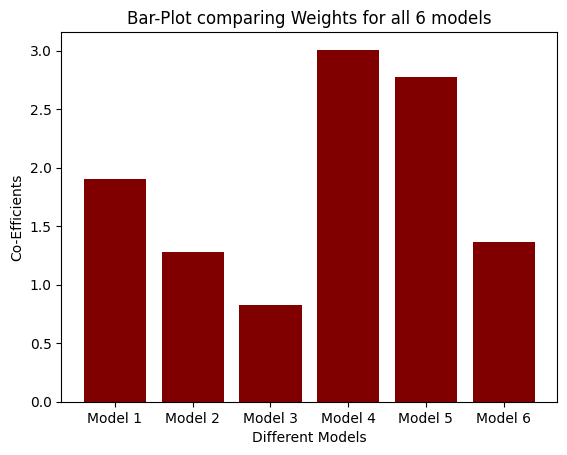

In [ ]:
y_axis = [model1.coef_[0][1], model2.coef_[0][1], model3.coef_[0][1], model4.coef_[0][0], model5.coef_[0][0], model6.coef_[0][0]]
x_axis = ['Model 1', 'Model 2', 'Model 3', 'Model 4', 'Model 5', 'Model 6']

plt.bar(x_axis, y_axis, color="maroon")
plt.title('Bar-Plot comparing Weights for all 6 models')
plt.xlabel('Different Models')
plt.ylabel('Co-Efficients')
plt.show()

Intercept: [108847.74999414]
Coefficients: [[ 0.00000000e+00  7.69167038e+00 -3.10211282e-05]]


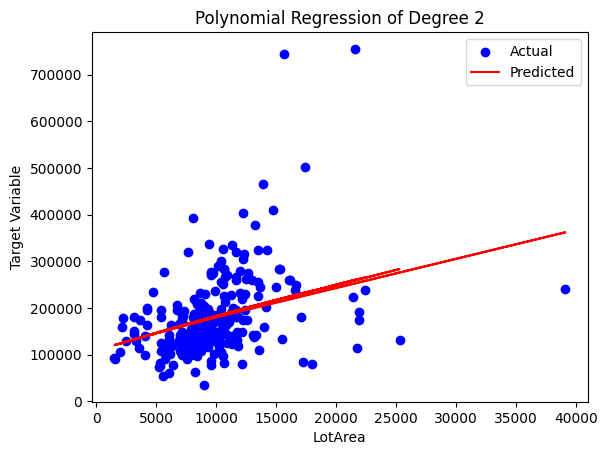

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import numpy as np
import matplotlib.pyplot as plt

xIII_train = X_train[['LotArea']]
xIII_test = X_test[['LotArea']]
yIII_train = Y_train
yIII_test = Y_test

poly_features = PolynomialFeatures(degree=2)
xIII_train_poly = poly_features.fit_transform(xIII_train)
xIII_test_poly = poly_features.transform(xIII_test)

model3 = LinearRegression()
model3.fit(xIII_train_poly, yIII_train)

intercept = model3.intercept_
coefficients = model3.coef_

print("Intercept:", intercept)
print("Coefficients:", coefficients)

yIII_pred = model3.predict(xIII_test_poly)

plt.scatter(xIII_test, yIII_test, color='blue', label='Actual')
plt.plot(xIII_test, yIII_pred, color='red', label='Predicted')
plt.xlabel('LotArea')
plt.ylabel('Target Variable')
plt.title('Polynomial Regression of Degree 2')
plt.legend()
plt.show()

Intercept: [73222.41814035]
Coefficients: [[ 0.00000000e+00  1.32677915e+01 -1.94950317e-04  6.49546195e-10]]


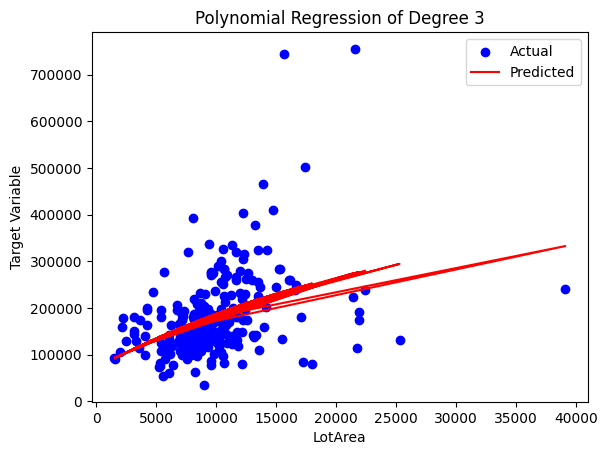

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import numpy as np
import matplotlib.pyplot as plt

xIII_train = X_train[['LotArea']]
xIII_test = X_test[['LotArea']]
yIII_train = Y_train
yIII_test = Y_test

poly_features = PolynomialFeatures(degree=3)
xIII_train_poly = poly_features.fit_transform(xIII_train)
xIII_test_poly = poly_features.transform(xIII_test)

model3 = LinearRegression()
model3.fit(xIII_train_poly, yIII_train)

intercept = model3.intercept_
coefficients = model3.coef_

print("Intercept:", intercept)
print("Coefficients:", coefficients)

yIII_pred = model3.predict(xIII_test_poly)

plt.scatter(xIII_test, yIII_test, color='blue', label='Actual')
plt.plot(xIII_test, yIII_pred, color='red', label='Predicted')
plt.xlabel('LotArea')
plt.ylabel('Target Variable')
plt.title('Polynomial Regression of Degree 3')
plt.legend()
plt.show()

Intercept: [179871.97759025]
Coefficients: [[ 0.00000000e+000  2.79888309e-050 -8.22896144e-100  5.12408419e-078
   7.12811733e-073  4.90922858e-068  3.38548983e-063  2.32923374e-058
   1.58073644e-053  1.01953277e-048  5.36771847e-044 -2.49372904e-049]]


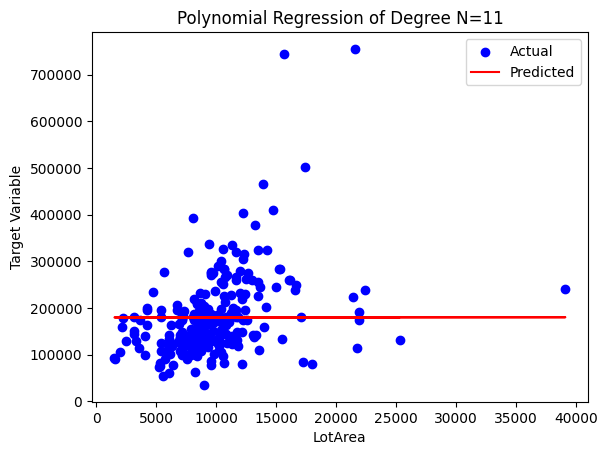

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import numpy as np
import matplotlib.pyplot as plt

# Prepare the data
xIII_train = X_train[['LotArea']]
xIII_test = X_test[['LotArea']]
yIII_train = Y_train
yIII_test = Y_test

# Perform polynomial feature transformation for degree 3
poly_features = PolynomialFeatures(degree=11)
xIII_train_poly = poly_features.fit_transform(xIII_train)
xIII_test_poly = poly_features.transform(xIII_test)

# Create and train the polynomial regression model
model3 = LinearRegression()
model3.fit(xIII_train_poly, yIII_train)

# Get the coefficients and intercept of the polynomial regression model
intercept = model3.intercept_
coefficients = model3.coef_

# Print the coefficients and intercept
print("Intercept:", intercept)
print("Coefficients:", coefficients)

# Make predictions on the test set
yIII_pred = model3.predict(xIII_test_poly)

# Plot the results if desired
plt.scatter(xIII_test, yIII_test, color='blue', label='Actual')
plt.plot(xIII_test, yIII_pred, color='red', label='Predicted')
plt.xlabel('LotArea')
plt.ylabel('Target Variable')
plt.title('Polynomial Regression of Degree N=11')
plt.legend()
plt.show()
